In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
from runner import Runner

In [4]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmptqp03lb5GP2
Verbose mode active!


In [5]:
# load our larger toy dataset (10k images and masks)
# images = np.load('/raid/mpsych/GP2TOYEXAMPLE_LARGE/images.npy')
# masks = np.load('/raid/mpsych/GP2TOYEXAMPLE_LARGE/masks.npy')
images = np.load('/hpcstor6/scratch01/y/y.shah001/Forest_Segmented/Forest_Segmented/Forest_final_img_unm.npy')
masks = np.load('/hpcstor6/scratch01/y/y.shah001/Forest_Segmented/Forest_Segmented/Forest_final_mask_unm.npy')

In [6]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [7]:
len(images)

5108

In [8]:
len(masks)

5108

In [9]:
#
#
R.setup_data(images, masks, dataset_size=5108, weights=weights)

Weights OK!


In [10]:
RUNS = 5

In [11]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
4/4 [==============================] - 31s 5s/step - loss: 1.2105 - dice_coeff: 0.5260 - val_loss: 1.3201 - val_dice_coeff: 0.4700
Epoch 2/100
4/4 [==============================] - 6s 2s/step - loss: 1.0797 - dice_coeff: 0.5761 - val_loss: 1.3011 - val_dice_coeff: 0.4774
Epoch 3/100
4/4 [==============================] - 6s 2s/step - loss: 1.0319 - dice_coeff: 0.5978 - val_loss: 1.2662 - val_dice_coeff: 0.4913
Epoch 4/100
4/4 [==============================] - 6s 2s/step - loss: 0.9743 - dice_coeff: 0.6164 - val_loss: 1.2296 - val_dice_coeff: 0.5069
Epoch 5/100
4/4 [==============================] - 6s 2s/step - loss: 0.9480 - dice_coeff: 0.6271 - val_loss: 1.2010 - val_dice_coeff: 0.5200
Epoch 6/100
4/4 [==============================] - 6s 2s/step - loss: 0.9142 - dice_coeff: 0.6411 - val_loss: 1.1835 - val_dice_coeff: 0.5283
Epoch 7/100
4/4 [==============================] - 6s 2s/step - loss: 0.9134 - dice_coeff: 0.6469 - val_loss: 1.1658 - val_dice_coeff: 0

D_relabeled_ 45
selected_ids ['3418cdbf-4222-4b1a-98bb-ea4ea9df59f4', 'd4170e75-e87a-4233-a7f5-5f67d8ec7bec', 'd24020a3-30b0-4724-93c9-7e5a3052f778', 'e250bcb8-bc86-4a81-ad6b-3d9fbb9a8104', '7e29db63-73b5-4d45-9433-9e58279b1508', 'ecdc685b-aae3-4734-a65c-436980e908d9', '68972c4a-5903-4872-a762-77bac9e30875', '3d4e9286-f622-44ff-8e19-06d9fb21db8e', '580622a5-b1ce-4fb7-aa7b-e73fbc802065', '93864a78-c739-46c5-a881-aa4dbdfa3785', 'c747a057-35e0-4fe0-a476-eaee90be0cc7', '21cecf28-0b0b-415b-92ab-6a867fd398c0', '1c58ae12-2dab-45d2-8adf-879de30b0f51', '6f2acb74-e157-42ec-bfa5-c80ec3c0640d', '2f321d42-68ac-4383-8d73-702707a51f3b', 'bb406c87-a2e8-464a-83fd-0ae603cbfe02', '0f602af2-e436-4c01-9812-69e5c160df54', 'ac700741-a6e1-45d9-afe6-5f2524c4d198', 'a67f04f7-b406-4197-ac91-212a59edf4e4', '9c2c29a0-52ea-4edd-acef-880f06f20b53', 'b58afd50-6f1e-4026-8a67-227ecd104402', '71c80f9d-24c0-4e8f-923e-86a35975adaa', '13e07a25-120f-494b-bfae-78f41a039ff3', '48e02cba-3f4f-4383-a1cb-4426c24f6e94', 'c38f06b6-

Replacing 49 from 148 !
D_relabeled_ 49
selected_ids ['570959fa-7e3a-4a4d-b38c-6782f77cf3d3', 'b15f66ee-b18d-42e0-898d-57dd01ced7fd', 'c4605d20-10c4-4934-ab5e-a6444e99a762', '588e5c25-b4e6-492f-92a3-81f320f24033', '7610166a-077b-4c58-a6b2-d80c74f31c38', '6e53e2e7-0a44-4fe2-980e-e6eb451bde20', 'd8f00801-2051-439a-bce0-339678d875cd', '3239145f-d993-474a-aff6-4779ab121c07', '3b2b2f95-2f4a-4cba-88e3-93fe25a475d2', 'afe822b2-807c-489a-9bf0-ed876e9f43ef', 'a2a167fe-93aa-4d4f-9890-8d3f6ac08f57', '68af1e86-0891-4800-a5fe-15531028462f', '931e3727-53ed-4f18-982c-b3fc1234ac94', 'a915a202-c389-4cb6-b149-d41158b82571', 'ae65f0a5-258a-4fca-8fed-f39bcc26809d', '8a892d6b-0b12-4c12-a37d-923be7bdfde7', '8a4f9e89-ac4f-4d24-a485-3c29e80491e7', 'e9f5483d-b578-4e28-ad4b-dd0a99e9da9d', '5273dd09-ed6a-4945-ae68-38a00b44a1ea', '427fad4c-e708-4c8d-8834-07f3f6876a91', 'b52a42d3-6d9d-40dd-b967-6c562858c5e2', '4b5d943e-e2d1-4e4f-af98-d0b22ecc7299', '04bd28d1-0792-44f4-a279-2dece147a9af', 'c01c6b21-4fef-4d52-9c73-1

Replacing 54 from 164 !
D_relabeled_ 54
selected_ids ['4faccdb5-df92-4f5a-8ec0-93725b33d1d2', 'ad0f5f7b-7705-4c67-b104-1ac97fe896a7', '01631f93-2aa5-46e7-86de-8611a9d4dde5', 'f9c325b6-1690-4028-948c-1f4f865a345f', 'c17440b9-ff58-48e4-b5fe-755a6fcc9ba4', 'b294b0dd-8457-4b59-8dd9-d75d7cdba575', 'eba95ced-a98e-459e-86b6-d2ce6dd6ac18', '1987cb8a-1c38-489d-be95-af109e83d8ef', '13f6ed8e-6b58-4c93-b3dd-43e1f9d30d34', '02fff5ef-cbde-4de3-89ba-ba3f4da4466a', 'dabb22e2-d12d-4ee0-99e2-c555ebc404d1', 'ce0f24f2-22b4-48e8-9224-4dd33127f409', 'f33c95e8-c951-4e4b-a48c-50a6f08cd20c', '3d4dd01b-0bee-4bf7-8a48-8b721a0f3cf3', 'f1865fd2-6637-4223-ba07-05039ca39fe9', '1bc5b985-5430-4128-83be-a4b788ba74e1', 'b665ed71-21e8-43ae-937f-306d270c185c', '8ee1e63f-177c-40e3-9932-692b6fd0fd5d', 'ff38ba8b-6988-4deb-a34c-d1c34ac41ad4', '7333587f-1fd1-49cb-a7aa-24230fda5942', '604d82c6-b0a3-4a7c-adbe-4d06f555648e', '3edab1d4-acd2-402f-b5b8-2f31ffc2d54e', '7360ba0e-16ab-490c-92b8-86d7a4237b04', 'd9d15e20-e509-4de4-bfd6-6

D_relabeled_ 46
selected_ids ['786650af-28d2-41e5-b8cf-ee1926b0814c', '630bbf5a-55a1-4bb1-9e75-1b2145404e06', '97f68a51-ffd5-47a4-8689-1840e439a47f', '777aff93-76cf-43fa-9167-e465014d13df', '1240bb6f-ca19-4cef-bdea-ed5c57f7152b', '8f64cb41-e33d-4810-b802-2c046e851b33', '52cb04e8-9080-4a14-84ab-e704b3f5b181', 'e27ee7da-46af-46de-9ec2-d41a556d274c', '525501ba-0d3d-4014-affb-a8283c79b860', '467d9721-a4d4-463f-8007-45a4a34fe2e5', 'a109fbf7-c405-47a5-9ea7-30f1e07f4bcc', 'b3d45b06-4ae5-4a56-b244-d9d7011faaa9', '4bdf252e-672d-4d39-86f9-8e132a76b29e', 'd6749119-7bdd-4561-a93c-2f602a9c5a9e', '6b0de704-5bfd-4c1c-a677-c9a28735252d', 'b8bd7aef-2c4f-4485-aea9-0a990a297e67', 'ea8ffd06-2b29-41c2-8ad5-6b6446de2ea5', 'c657f361-b7da-4e29-b683-98d4e4f587d9', '1bbfe990-6651-4c64-b8b2-bd3ce63f2904', '63201229-bae2-4c8d-9a90-354061e0f35a', '6f2b1b79-ab0b-40e0-a0e2-bf4cf8040cef', '3d81b4e7-e53a-48f2-916f-0d09494683b3', '1ddcaf7c-9cf7-481c-a2a0-5cd06401ac52', 'b1641364-be4e-4803-a50f-c7c2ca0a1735', '66f2463d-

In [12]:
R.classifier_scores

[[1.142256736755371, 0.549638032913208],
 [1.4038879871368408, 0.4464454650878906],
 [1.1490415334701538, 0.5483900904655457],
 [2.243988275527954, 0.2591499388217926],
 [2.8824589252471924, 0.16493384540081024]]

In [13]:
R.discriminator_scores

[[0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [12.610363006591797, 0.9379084706306458],
 [52.20532989501953, 0.7189542651176453]]

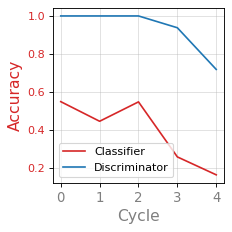

In [14]:
R.plot()

In [10]:
R.classifier_scores

[[0.9156632423400879, 0.4058244526386261],
 [0.6621054410934448, 0.525407612323761],
 [0.432913213968277, 0.6711912155151367],
 [0.23769482970237732, 0.818067729473114],
 [0.12111461162567139, 0.9171703457832336]]

In [11]:
R.discriminator_scores

[[0.18762366473674774, 0.9866666793823242],
 [8.597139358520508, 0.7649999856948853],
 [10.293930053710938, 0.7416666746139526],
 [12.015337944030762, 0.70333331823349],
 [10.586000442504883, 0.7483333349227905]]

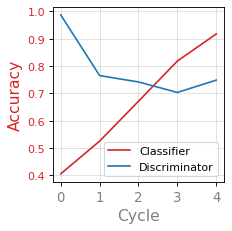

In [12]:
R.plot()